In [6]:
import sys

sys.path.append("..")

In [7]:
from nrc import NoisyRingsClustering
from nrc.datagen import random_circles, random_noise
import numpy as np

In [8]:
import matplotlib.pyplot as plt

INFO:root:Converged after 9 iterations. Stopping early.


[[ 485.15466862   94.56051337]
 [-138.49318686  220.74612927]
 [-305.92704226  266.37051472]
 [ 373.4590683  -407.51217671]]
Total of noise points:  0  out of  200
Total of noise points:  0  out of  200
Total of noise points:  0  out of  200
Total of noise points:  0  out of  200


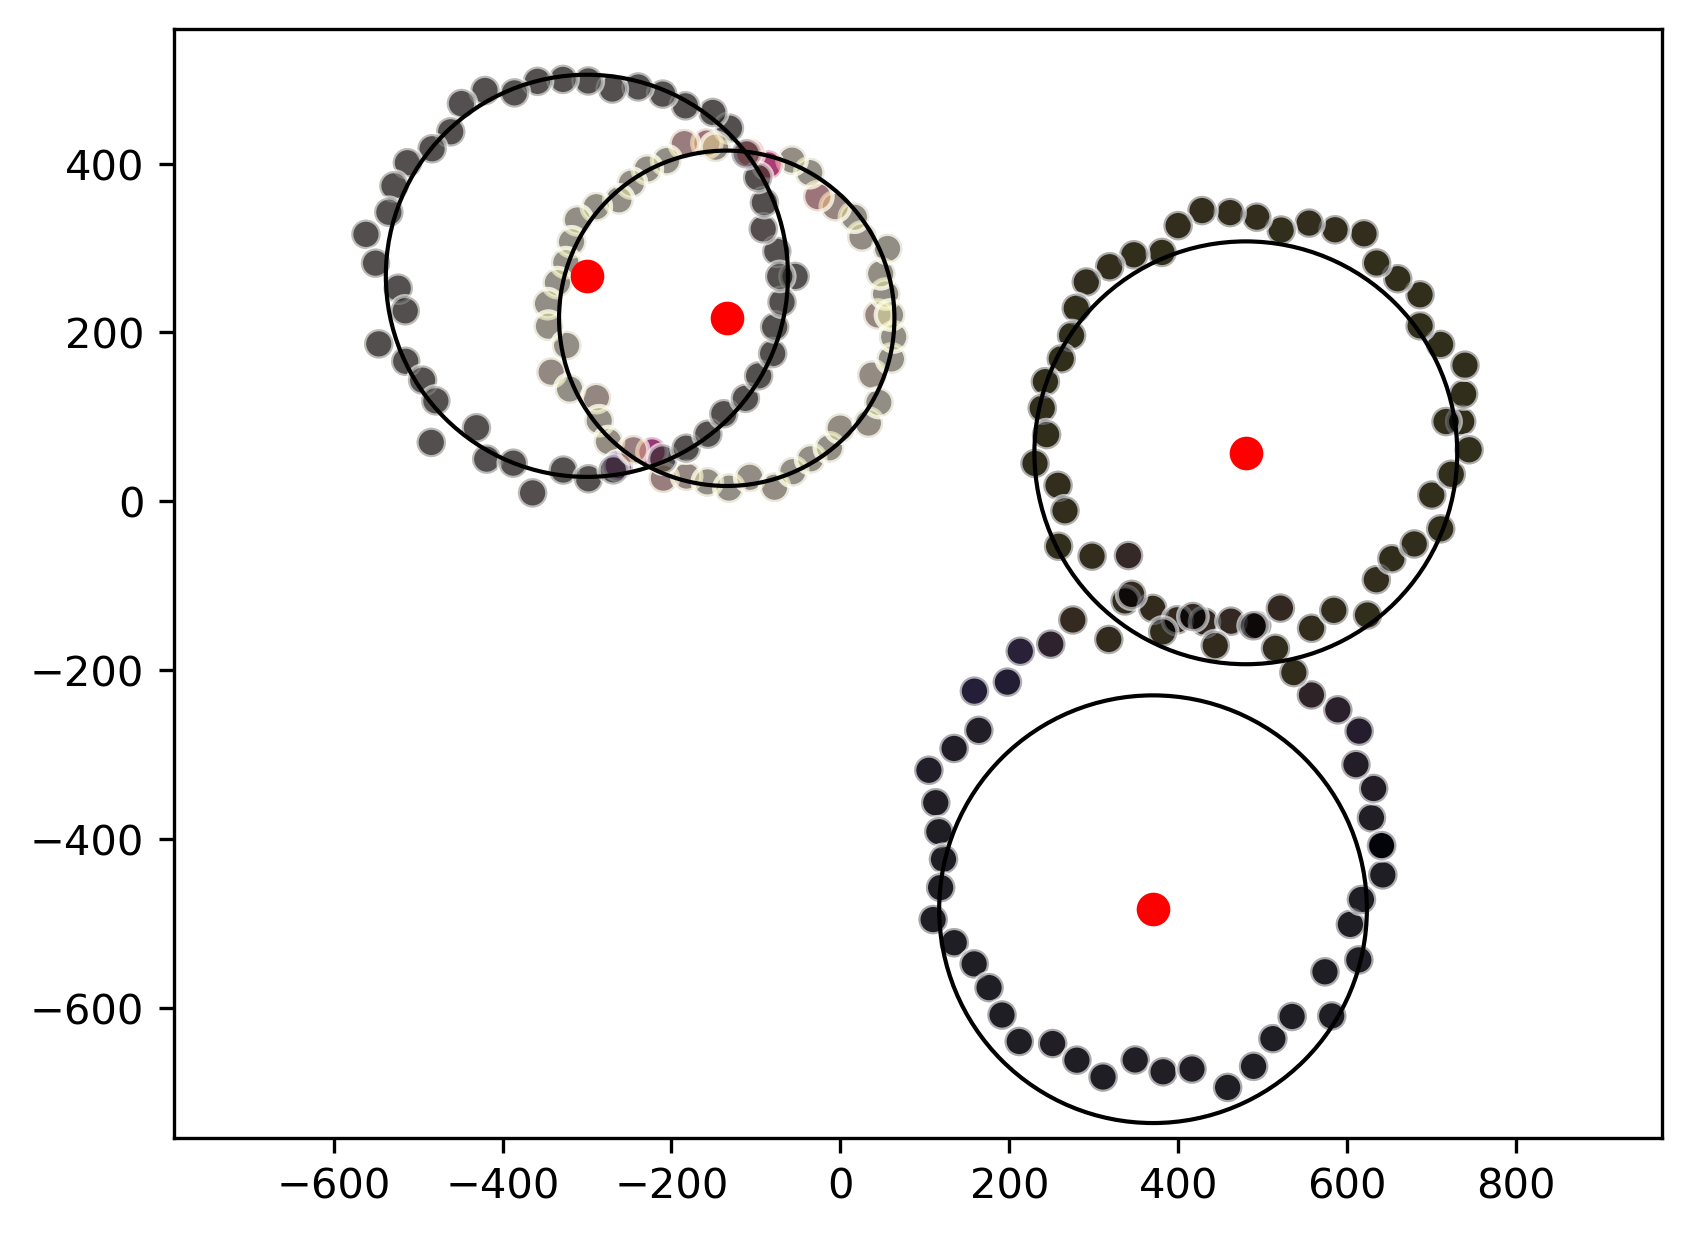

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from random import uniform

# high res plt
plt.rcParams["figure.dpi"] = 300
# Assuming random_circles and random_noise are defined functions
# that generate the necessary data

# Generate circles and noise data
center_delims = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
minmax_radius = np.array([200, 300])
n_rings = 4
circles = random_circles(center_delims, minmax_radius, 50, n_rings, noise=12)

# Generate additional noise
noise = random_noise(center_delims, 0, 0.1)

# Combine circles and noise
circles = np.concatenate([circles, noise])


# Fit the clustering model
model = NoisyRingsClustering(n_rings=n_rings, q=1.5)
model.fit(circles)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct colormaps for each ring
colormaps = ["viridis", "plasma", "inferno", "magma"]  # Add more if needed

# Ensure we have as many colormaps as we have rings
if len(colormaps) < n_rings:
    raise ValueError("Not enough distinct colormaps for the number of rings")

# Draw the points with gradient colors
for cluster in range(n_rings):
    cluster_memberships = memberships[cluster, :]
    norm = Normalize(vmin=0, vmax=1)
    cmap = plt.get_cmap(colormaps[cluster])
    cluster_colors = cmap(norm(cluster_memberships))

    # if a point is noise, color it black
    cluster_colors[np.where(cluster_memberships == -1)] = [0, 0, 0, 1]
    print(
        "Total of noise points: ",
        len(np.where(cluster_memberships == -1)[0]),
        " out of ",
        len(cluster_memberships),
    )
    plt.scatter(
        circles[:, 0], circles[:, 1], c=cluster_colors, alpha=0.5, edgecolors="w", s=50
    )

# Draw circles with radii
for i in range(len(radii)):
    circle = plt.Circle(centers[i], radii[i], fill=False, edgecolor="black")
    plt.gca().add_artist(circle)
    # draw the center of the circle
    plt.scatter(centers[i][0], centers[i][1], c="red", s=50)

# Show the plot
plt.axis("equal")
plt.show()